In [65]:
import qutip
import tensornetwork as tn
from tensornetwork.visualization.graphviz import to_graphviz 
import qutip_tensornetwork as qtn
import numpy as np
from qutip_tensornetwork import data
from qutip_tensornetwork.quantum import QuOperator
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


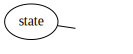

In [66]:
# Create random ket for 15 qubits as a network.
# Why 15 you may ask. Well, why not? :)
n = 20
random_state = qutip.rand_ket(N=2**n, dims=[[2]*n, [1]*n]).to('network')

# We will name it just because we can
nodes = random_state.data.nodes
nodes.pop().name = "state"
random_state.data

In [67]:
2**n*128/1024/1024/1024 #GB

0.125

In [68]:
2**n*2**n*128/1024**3 # No way we represent this dense operator

131072.0

In [69]:
# The dimension at this moment of the network is 2**n instead of [2]*n
# That is because we obtained the data transforming it from a dense 
# representation.
random_state.data.out_edges[0].dimension

1048576

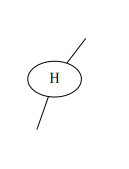

In [70]:
# Tensor operation already included
h_single = qutip.operations.hadamard_transform().to('network')
h_single.data.nodes.pop().name = "H"
h_single.data

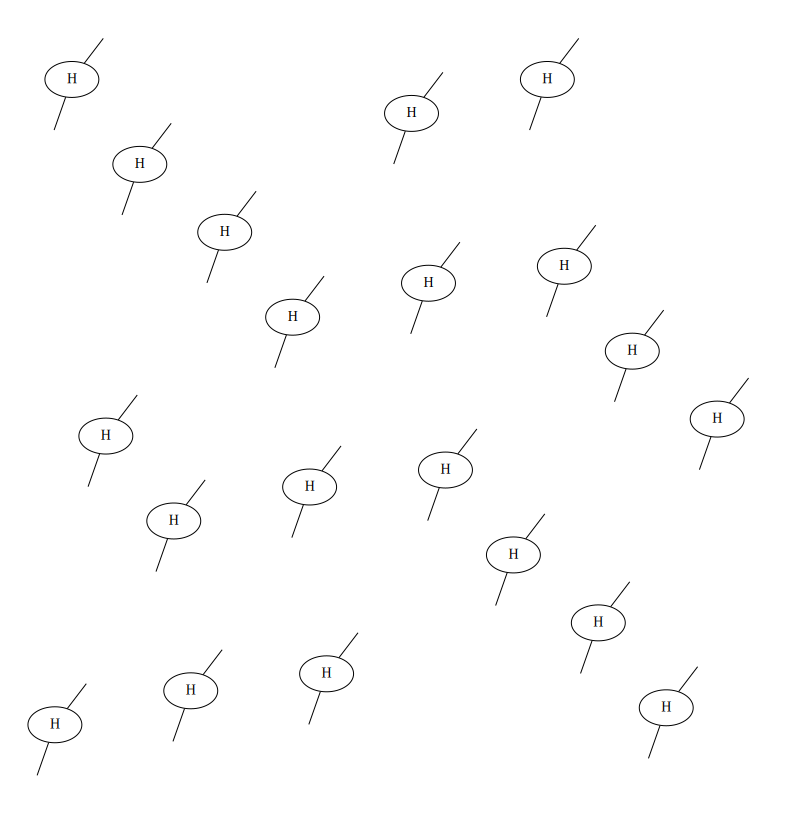

In [71]:
h_tensor = qutip.tensor([h_single]*n)
h_tensor.data

In [72]:
# H does have the dimension of [2]*n
h_tensor.data.dims

[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]]

In [51]:
result = h_tensor@random_state

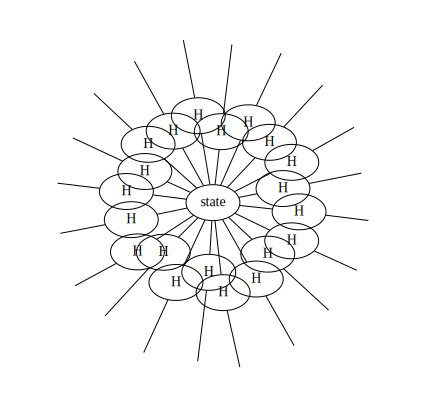

In [52]:
result.data

In [53]:
%%timeit
# Similar in speed to the wrapper method.
result =  h_tensor*random_state
result.data.to_array()

243 ms ± 16.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [64]:
# With dense it just breaks. We can not represent the operator.
random_state = random_state.to('dense')
h_tensor = h_tensor.to('dense')

ValueError: The network includes unexpected dangling edges (that are not members of ignore_edges).

In [10]:
%%timeit 
result_dense = h_tensor*random_state 

273 ms ± 22.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
